In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# **Pre-Processing**

### **1. Load and Read Data**

In [2]:
df = pd.read_csv('../data/student_habits_performance.csv')

### **2. Inspect Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

##### **We can infer that all columns except *parental_education_level* have no null values.**
##### **The *student_id* column is unnecessary for our goal of predicting exam scores based off of student habits.** 
##### **The *gender*, *part_time_job*, *diet_quality*, *parental_education_level*, *internet_quality*, and *extracurricular_participation* columns are all non-numbers and must be converted for scaling and training.**

### **3. Fill Null Values**

##### **Fill the null-values in the parental_education_level column.**

In [4]:
filler = df['parental_education_level'].mode()[0]
df['parental_education_level'] = df['parental_education_level'].fillna(filler)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

### **4. Drop Unnecessary Columns**

##### **Drop the *ID* column because it is unnecessary.**

In [5]:
df.drop(columns=['student_id'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       1000 non-null   object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   in

### **5. Convert String Values**

##### **Inspect the columns with string values**

In [6]:
print(df['gender'].value_counts(), '\n')
print(df['part_time_job'].value_counts(), '\n')
print(df['diet_quality'].value_counts(), '\n')
print(df['parental_education_level'].value_counts(), '\n')
print(df['internet_quality'].value_counts(), '\n')
print(df['extracurricular_participation'].value_counts())

gender
Female    481
Male      477
Other      42
Name: count, dtype: int64 

part_time_job
No     785
Yes    215
Name: count, dtype: int64 

diet_quality
Fair    437
Good    378
Poor    185
Name: count, dtype: int64 

parental_education_level
High School    483
Bachelor       350
Master         167
Name: count, dtype: int64 

internet_quality
Good       447
Average    391
Poor       162
Name: count, dtype: int64 

extracurricular_participation
No     682
Yes    318
Name: count, dtype: int64


##### **Convert the string values into integers**

In [7]:
pd.set_option('future.no_silent_downcasting', True)
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1, 'Other': 2}).astype(int)
df['part_time_job'] = df['part_time_job'].replace({'No': 0, 'Yes': 1}).astype(int)
df['diet_quality'] = df['diet_quality'].replace({'Poor': 0, 'Fair': 1, 'Good': 2}).astype(int)
df['parental_education_level'] = df['parental_education_level'].replace({'High School': 0, 'Bachelor': 1, 'Master': 2}).astype(int)
df['internet_quality'] = df['internet_quality'].replace({'Poor': 0, 'Average': 1, 'Good': 2})
df['extracurricular_participation'] = df['extracurricular_participation'].replace({'No': 0, 'Yes': 1}).astype(int)

### **6. Set X (Feature Matrix) and y (Target Vector)**

In [8]:
X = np.array(df.drop(columns=['exam_score']))
y = np.array(df['exam_score'])

### **7. Split Data**

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# **Training Model**

##### **Train using basic linear regression, ridge regression, lasso regression, and elastic net regression in a pipeline where data is scaled first**

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

lin_pipe = Pipeline(steps=[('scaler', StandardScaler()), ('estimator', LinearRegression())]).fit(X_train, y_train)
ridge_pipe = Pipeline(steps=[('scaler', StandardScaler()), ('estimator', Ridge())]).fit(X_train, y_train)
lasso_pipe = Pipeline(steps=[('scaler', StandardScaler()), ('estimator', Lasso())]).fit(X_train, y_train)
elastic_pipe = Pipeline(steps=[('scaler', StandardScaler()), ('estimator', ElasticNet())]).fit(X_train, y_train)

##### **Test models**

In [11]:
from sklearn.metrics import root_mean_squared_error as rmse

lin_pipe_pred = lin_pipe.predict(X_test)
ridge_pipe_pred = ridge_pipe.predict(X_test)
lasso_pipe_pred = lasso_pipe.predict(X_test)
elastic_pipe_pred = elastic_pipe.predict(X_test)

print("Linear Regression:", rmse(y_test, lin_pipe_pred))
print("Ridge:", rmse(y_test, ridge_pipe_pred))
print("Lasso:", rmse(y_test, lasso_pipe_pred))
print("Elastic Net:", rmse(y_test, elastic_pipe_pred))

Linear Regression: 5.096739132437629
Ridge: 5.09804550782312
Lasso: 5.768339367886458
Elastic Net: 7.807204147907884


##### **Attempt to improve regularized models by testing different alpha values**


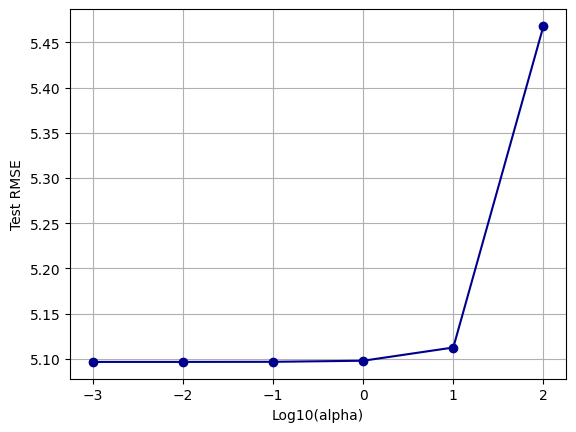

Ridge: Best Alpha - 0.001, Best RMSE - 5.096740406172864


In [12]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
rmse_vals = []
rmse_best, alpha_best = 100, 100

for a in alphas: 
    pipe = Pipeline(steps=[('scaler', StandardScaler()), ('estimator', Ridge(alpha=a))]).fit(X_train, y_train)
    pipe_pred = pipe.predict(X_test)
    pipe_rmse = rmse(y_test, pipe_pred)
    rmse_vals.append(pipe_rmse)
    if pipe_rmse <= rmse_best:
        rmse_best = pipe_rmse
        alpha_best = a

plt.plot(np.log10(alphas), rmse_vals, color=(0, 0, 0.55), marker='o')
plt.xlabel('Log10(alpha)')
plt.ylabel('Test RMSE')
plt.grid(True)
plt.show()

print(f"Ridge: Best Alpha - {alpha_best}, Best RMSE - {rmse_best}")

##### **The sweet spot is alpha set to 0.001 for ridge regression**

# **Decide On Final Model**

##### **The model using linear regression has the lowest RMSE value.**
##### **Therefore, the final model will use linear regression**

In [13]:
final_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', LinearRegression())]).fit(X_train, y_train)
final_model_pred = final_pipe.predict(X_test)
rmse(y_test, final_model_pred)

5.096739132437629

# **Save Model For Further Use**

In [14]:
from joblib import dump

dump(final_pipe, 'pipe.joblib')

['pipe.joblib']